 # Import Dataset

In [46]:
import pandas as pd
import numpy as np

In [47]:
from cmdstanpy import CmdStanModel
import arviz as az

import matplotlib.pyplot as plt

In [48]:
with open("fecondità_finale", "rb") as f:
    dataset=pd.read_csv(f)
    
dataset = dataset.sort_values(by=['Territorio', 'TIME']) # the proximity matrix is built with the prov in alphabetic order
dataset

,Territorio,TIME,età.media.delle.madri.al.parto,età.media.dei.padri.alla.nascita.del.figlio,tasso.di.fecondità.totale,tasso.di.inattività.dei.maschi,tasso.di.inattività.delle.femmine,tasso.di.inattività.totale,tasso.di.occupazione.dei.maschi,tasso.di.occupazione.delle.femmine,tasso.di.occupazione.totale
930,Agrigento,2011,30.94,34.80,1.37,42.911800,75.561168,59.924924,47.392418,19.828757,33.029603
931,Agrigento,2012,30.73,34.57,1.35,43.934839,74.366121,59.780301,45.282895,20.513632,32.385627
932,Agrigento,2013,31.09,34.78,1.27,46.361107,73.567265,60.518499,43.469198,19.889053,31.198656
933,Agrigento,2014,30.99,35.06,1.33,47.098738,72.427712,60.272133,39.673492,20.296449,29.595648
934,Agrigento,2015,31.14,34.97,1.27,45.169256,75.916130,61.148536,40.057236,18.153835,28.674135
...,...,...,...,...,...,...,...,...,...,...,...
625,Viterbo,2016,31.99,35.76,1.23,39.518267,60.635768,50.408778,52.769263,32.263986,42.194134
626,Viterbo,2017,32.17,35.73,1.16,41.158020,61.241767,51.511845,51.680541,33.283508,42.195912
627,Viterbo,2018,32.05,35.64,1.20,42.945825,61.820030,52.659989,50.508888,33.458828,41.733539
628,Viterbo,2019,31.97,35.51,1.11,44.935350,63.118101,54.287825,49.777042,32.974065,41.133933


0.015125712353150588
1.3187169811320756
[[ 1.86310328  1.37281295 -0.58834841 ... -0.09805807 -1.32378391
  -0.83349357]
 [ 1.3764944   1.23310957  0.37280057 ... -0.7742781  -1.49120227
  -1.77797194]
 [ 1.44853442  1.32577726  0.46647719 ... -1.00660866 -1.37488013
  -1.37488013]
 ...
 [-0.15041421  2.25621314 -1.35372788 ...  0.15041421 -1.05289947
   0.45124263]
 [ 1.25685463  1.55971117  0.65114155 ... -0.56028459 -1.46885421
  -1.31742594]
 [ 1.33591282  1.33591282  0.22265214 ... -0.19482062 -1.44723888
  -1.72555405]]
(106, 10)


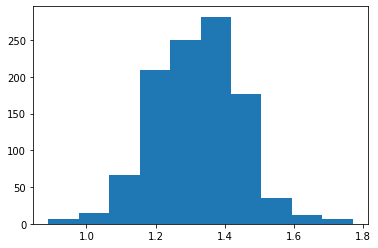

In [49]:
Y=np.array(dataset["tasso.di.fecondità.totale"])

print(np.var(Y))
print(np.mean(Y))


y = []
y_tmp = np.zeros(10)
for prov in np.unique(dataset["Territorio"]):
    data_prov = dataset[dataset["Territorio"] == prov]
    y_tmp = np.array(data_prov["tasso.di.fecondità.totale"])
    y_tmp = (y_tmp - np.mean(y_tmp))/np.sqrt(np.var(y_tmp)) #if you want to stand the answer
    y.append(y_tmp)
y = np.array(y)
print(y)
print(y.shape)
plt.hist(Y)  
plt.show()

In [50]:
# mega matrix with the covariates, da normalizzare forse?
X1=np.array(dataset["età.media.delle.madri.al.parto"])
X2=np.array(dataset["tasso.di.occupazione.delle.femmine"])
X3=np.array(dataset["tasso.di.inattività.delle.femmine"])
X4=np.array(dataset["tasso.di.occupazione.dei.maschi"])
X5=np.array(dataset["tasso.di.inattività.dei.maschi"])
X6=np.array(dataset["età.media.dei.padri.alla.nascita.del.figlio"]) 


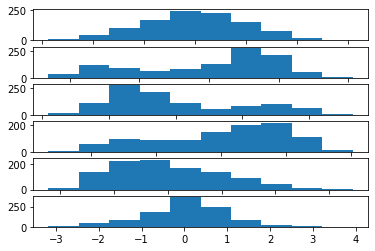

In [51]:
P = 6
X=np.ones((1060,P+1))

X1 = (X1 - np.mean(X1))/np.sqrt(np.var(X1))  #if u want to standardize the first cov 
X[:,1]=X1
X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2))  #if u want to standardize the sec cov
X[:,2]=X2
X3 = (X3 - np.mean(X3))/np.sqrt(np.var(X3)) #if u want to standardize the third cov 
X[:,3]=X3
X4 = (X4 - np.mean(X4))/np.sqrt(np.var(X4)) #if u want to standardize the fourth cov 
X[:,4]=X4
X5 = (X5 - np.mean(X5))/np.sqrt(np.var(X5)) #if u want to standardize the 5 cov
X[:,5]=X5
X6 = (X6 - np.mean(X6))/np.sqrt(np.var(X6)) #if u want to standardize the 5 cov
X[:,6]=X6


X_r = np.reshape(X,(106,10,P+1))

#print(X_r)
#X_r.shape

fig,axs = plt.subplots(6)
axs[0].hist(X1)
axs[1].hist(X2)
axs[2].hist(X3)
axs[3].hist(X4)
axs[4].hist(X5)
axs[5].hist(X6)
plt.show()

In [52]:
I= 106
T= 10
H= 10

In [53]:
with open("proximity_matrix", "rb") as f:
    W_raw=pd.read_csv(f)

In [54]:
W_raw=np.matrix(W_raw)

# Prepare data for model

In [55]:
for i in range(106):
  W_raw[i,i] = 0

W_raw=np.matrix(W_raw)
Wt = W_raw.transpose()
(Wt == W_raw).all()

True

In [56]:
# compute Qinv
one_vector = np.ones(shape = (I,1))
B = np.matmul(W_raw , one_vector)
A =  np.diagflat(np.array(B))
W_intermedia = A - W_raw


rho = 0.95 
Q = rho * W_intermedia  + (1-rho) * np.eye(I)
Qinv = np.linalg.inv(Q)
# Qinv.shape
W_intermedia.shape

(106, 106)

In [57]:
#Qinv must be positive definite
for i in range(I):
  for j in range(I):
    Qinv[j,i] = Qinv[i,j]

Qinv=np.matrix(Qinv)
Qinvt = Qinv.transpose()
print((Qinv == Qinvt).all())

#np.linalg.eig(Qinv)

True


# Prior predictive check 

In [36]:
mu_0 = np.zeros(P+1) #as in the paper
mu_w_1 = np.zeros(I) #as in the paper
sigma_0 = 1 #covariance matrix
a_alpha = 3
b_alpha = 2
a_tau2 = 3
b_tau2 = 2
a_sigma2 = 3
b_sigma2 = 2
rho = 0.95
a_xi = 1
b_xi = 1

[3.38717989e-02 5.71057602e-01 3.37515914e-01 6.90717775e-03
 5.05559095e-02 2.80436378e-05 5.30639473e-05 8.24329845e-06
 2.18106169e-06 6.56331691e-08]
[[-0.38964647  0.9372965  -0.8169742   1.01961544 -0.34143633  0.7512814
  -0.36225179]
 [-1.12913125 -0.34971048 -1.05272652  1.28227668 -0.17180538  0.57765806
  -1.47497488]
 [ 0.07878845  0.91841365 -0.49269736  0.09646237 -0.65275994 -0.22176244
  -1.06828657]
 [-1.22769205 -1.79857302 -0.68520734 -1.40986887  1.25239859  0.46956276
   0.32692165]
 [ 1.80854321 -1.413068    2.52330509  0.3473178  -0.88735951 -1.05961725
   0.34795146]
 [-1.55866445 -0.99504103  2.62115252 -0.34088642 -0.16209416  0.43295951
  -0.00449346]
 [-1.86472139 -0.60772586  2.61912518  0.66359295  1.49161383 -0.18764498
   0.63650258]
 [ 1.61750813 -0.10197468 -0.31608082 -1.7764482   0.56051783  2.05015817
   0.14577399]
 [-0.74949021 -0.31014077 -1.2396806  -0.59347881 -0.43817284  0.28143276
  -0.20621966]
 [ 1.66945183 -1.07688513  0.3002728   0.50302

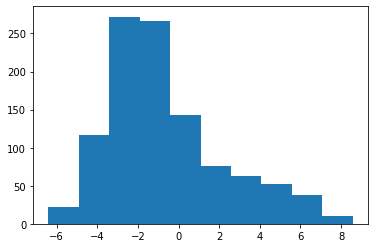

In [58]:
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions
np.random.seed(10)

# weight construction
weight = np.zeros(H)
v = np.zeros(H)
alpha = tfd.Gamma(a_alpha,b_alpha).sample()
v[0] = np.random.beta(a = 1,b = alpha)
weight[0] = v[0]
for h in range(1,H): 
    v[h] = np.random.beta(a = 1,b = alpha)
    cumprod = np.cumprod(1 - v[0:h])[h-1]
    weight[h] = v[h]*cumprod
    
weight = weight/ np.sum(weight)
print(weight)

# betas construction 
betas = []
beta = np.zeros(P+1)
for h in range(H):
    beta = np.array(np.random.multivariate_normal(mean=mu_0, cov = sigma_0*np.eye(P+1)))
    betas.append(beta)
                                         
betas = np.array(betas)
print(betas)
                                         
# tau2
tau2 = tfd.InverseGamma(concentration = a_tau2 , scale = b_tau2).sample()
                                         
# random effects construction 
xi = tfd.Beta(concentration1 = a_xi, concentration0 = b_xi).sample()
xi = 2*xi - 1
W=np.zeros((I,T))
diag_matrix_xis= xi*np.eye(I) #diag(xis)                                          
W[:,0]=np.random.multivariate_normal(mean=mu_w_1,cov=tau2*Qinv)
for t in range(T-1):
    W[:,t+1]=np.random.multivariate_normal(mean=np.matmul(diag_matrix_xis,W[:,t]), cov=tau2*Qinv)

# sigma
sigma2 = tfd.InverseGamma(concentration = a_sigma2 , scale = b_sigma2).sample()                                     

# y construction 
y1 = np.zeros(I*T)                                   
for i in range(I):                                   
    for h in range(H):
        y1[i*T:(i+1)*T] += weight[h]*np.random.multivariate_normal(mean=np.matmul(X_r[i],betas[h]) + W[i,:], cov = sigma2*np.eye(T))
                                         
plt.hist(y1)   # lo voglio simile all'istogramma sopra 
plt.show()

# Model with alpha fixed

In [ ]:
data_fixed_alpha = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "mu_0": mu_0,
    "sigma_0": sigma_0,
    "mu_w_1": mu_w_1,
    "alpha": 5,
    "a_tau2": a_tau2,
    "b_tau2": b_tau2,
    "a_sigma2": a_sigma2,
    "b_sigma2": b_sigma2,
    "rho": rho,
    "a_xi": a_xi,
    "b_xi": b_xi,
    "inv_Q": Qinv
}

In [517]:
dp_mix_stan_alpha = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
      
    // hyperpar vector of regressors
    vector[P+1] mu_0; 
    real        sigma_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real a_xi;
    real b_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
}

parameters
{
    real<lower=0> sigma2; 
    real<lower=0> tau2;  
    
    // autoregressive coefficient construction
    real<lower=0,upper=1> xi_constructor;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // autoregressive coefficient of the random effects
    real xi = 2*xi_constructor-1;
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma = sqrt(sigma2);
    real tau = sqrt(tau2);
}

model
{
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    vs     ~ beta(1,alpha); 
    xi_constructor ~ beta(a_xi,b_xi);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "True_Dataset_alphafixed.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_stan_alpha)
    
dp_mix_alpha_fixed = CmdStanModel(stan_file=stan_file)

15:41:44 - cmdstanpy - INFO - compiling stan file /home/riccardo/bayesian-project/True_Dataset.stan to exe file /home/riccardo/bayesian-project/True_Dataset
15:42:16 - cmdstanpy - INFO - compiled model executable: /home/riccardo/bayesian-project/True_Dataset


In [518]:


fit = dp_mix_alpha_fixed.sample(data_fixed_alpha
                                , iter_warmup = 2000
                                , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                                )

15:42:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:24:50 - cmdstanpy - INFO - CmdStan done processing.
16:24:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset.stan', line 106, column 4 to column 30)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset.stan', line 106, column 4 to column 30)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset.stan', line 106, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!


16:24:52 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 51 divergent transitions (2.5%)
	Chain 2 had 449 divergent transitions (22.4%)
	Chain 4 had 191 divergent transitions (9.6%)
	Chain 4 had 2 iterations at max treedepth (0.1%)
	Use function "diagnose()" to see further information.


In [ ]:
fit.diagnose() 

# Model using a prior for alpha

In [ ]:
data_complete = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "mu_0": mu_0,
    "sigma_0": sigma_0,
    "mu_w_1": mu_w_1,
    "a_alpha": a_alpha,
    "b_alpha": b_alpha,
    "a_tau2": a_tau2,
    "b_tau2": b_tau2,
    "a_sigma2": a_sigma2,
    "b_sigma2": b_sigma2,
    "rho": rho,
    "a_xi": a_xi,
    "b_xi": b_xi,
    "inv_Q": Qinv
}

In [ ]:
dp_mix_complete = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
      
    // hyperpar vector of regressors
    vector[P+1] mu_0; 
    real        sigma_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real a_alpha;
    real b_alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real a_xi;
    real b_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
}

parameters
{
    real<lower=0> alpha;
    real<lower=0> sigma2; 
    real<lower=0> tau2;  
    
    // autoregressive coefficient construction
    real<lower=0,upper=1> xi_constructor;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // autoregressive coefficient of the random effects
    real xi = 2*xi_constructor-1;
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma = sqrt(sigma2);
    real tau = sqrt(tau2);
}

model
{
    alpha  ~ gamma(a_alpha,b_alpha);
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    vs     ~ beta(1, alpha); 
    xi_constructor ~ beta(a_xi,b_xi);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "True_Dataset_complete.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_complete)
    
dp_mix_alpha = CmdStanModel(stan_file=stan_file)

In [ ]:
fit = dp_mix_alpha.sample(data_complete
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                   )

# Model with prior for beta and sigma0  and alpha fixed

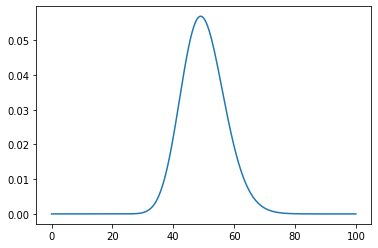

In [76]:
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions
np.random.seed(10)
a_0 = 50 # usando variance dei beta
b_0 = 1 # usando variance dei beta
x = np.linspace(0,100,1000)
dens = tfd.Gamma(a_0,b_0).prob(x)
plt.plot(x, dens)

In [77]:
eta_0 = np.array([0.22190255, -1.4776945, 0.10458943, -0.3656493, -0.10999949, -0.58602544, 0.1946157]) #sample mean of beta ols
tau_0 = 2 #to be choosen smartly, max of sample variance of beta ols
alpha = 10

data_prior0 = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "eta_0": eta_0, 
    "tau_0": tau_0, 
    "a_0": a_0, 
    "b_0": b_0, 
    "mu_w_1": mu_w_1,
    "alpha": alpha,
    "a_tau2": a_tau2,
    "b_tau2": b_tau2,
    "a_sigma2": 3, # usando variance ols
    "b_sigma2": 1, # usando variance ols # 1/(3-1) = 1/2 = 0.5
    "rho": rho,
    "a_xi": a_xi,
    "b_xi": b_xi,
    "inv_Q": Qinv
}

In [71]:
dp_mix_prior0 = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
    
    // prior mean for mu0
    vector[P+1] eta_0;
    
    // prior variance for mu0
    real tau_0;
    
    // hyperparam sigma20
    real a_0;
    real b_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real a_xi;
    real b_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
}

parameters
{
    real<lower=0> sigma2; 
    real<lower=0> tau2;  
    real<lower=0> sigma20;  
    
    vector[P+1] mu_0;
    
    // autoregressive coefficient construction
    real<lower=0,upper=1> xi_constructor;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // autoregressive coefficient of the random effects
    real xi = 2*xi_constructor-1;
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma = sqrt(sigma2);
    real tau = sqrt(tau2);
    real sigma_0 = sqrt(sigma20);
    
}

model
{
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    vs     ~ beta(1, alpha); 
    xi_constructor ~ beta(a_xi,b_xi);
    mu_0  ~ normal(eta_0, tau_0);
    sigma20 ~ gamma(a_0,b_0);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "True_Dataset_prior0.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_prior0)
    
dp_mix_prior = CmdStanModel(stan_file=stan_file)

13:14:27 - cmdstanpy - INFO - compiling stan file /home/riccardo/bayesian-project/True_Dataset_prior0.stan to exe file /home/riccardo/bayesian-project/True_Dataset_prior0
13:15:14 - cmdstanpy - INFO - compiled model executable: /home/riccardo/bayesian-project/True_Dataset_prior0


In [79]:
fit = dp_mix_prior.sample(data_prior0
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                   )

14:49:54 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:31:25 - cmdstanpy - INFO - CmdStan done processing.
16:31:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 129, column 12 to column 97)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 115, column 4 to column 30)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 113, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


16:31:28 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2000 iterations at max treedepth (100.0%)
	Chain 4 had 1589 iterations at max treedepth (79.5%)
	Use function "diagnose()" to see further information.


In [568]:
fit2 = dp_mix_prior.sample(data_prior0
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                   )

20:56:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:18:16 - cmdstanpy - INFO - CmdStan done processing.
22:18:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 115, column 4 to column 30)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 129, column 12 to column 97)
Consider re-running with show_console=True if the above output is unclear!


In [579]:
fit3 = dp_mix_prior.sample(data_prior0
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                   )

22:29:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:43:05 - cmdstanpy - INFO - CmdStan done processing.
23:43:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 129, column 12 to column 97)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_prior0.stan', line 115, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!


# Modello senza random effects

In [84]:
# to be checked
eta_0 = np.array([0.22190255, -1.4776945, 0.10458943, -0.3656493, -0.10999949, -0.58602544, 0.1946157]) #sample mean of beta ols
tau_0 = 51 #to be choosen smartly, max of sample variance of beta ols
a_0 = 7.5 # usando variance dei beta
b_0 = 1 # usando variance dei beta
alpha = 10

data_nows = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "eta_0": eta_0, 
    "tau_0": tau_0, 
    "a_0": a_0, 
    "b_0": b_0, 
    "alpha": alpha,
    "a_sigma2": 3, # usando variance ols
    "b_sigma2": 1, # usando variance ols # 1/(3-1) = 1/2 = 0.5
}

In [85]:
# to be checked
dp_mix_nows = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
    
    // prior mean for mu0
    vector[P+1] eta_0;
    
    // prior variance for mu0
    real tau_0;
    
    // hyperparam sigma20
    real a_0;
    real b_0;
    
    // alpha
    real alpha;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
}

parameters
{
    real<lower=0> sigma2; 
    real<lower=0> sigma20;  
    
    vector[P+1] mu_0;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // Stan wants std
    real sigma = sqrt(sigma2);
    real sigma_0 = sqrt(sigma20);
    
}

model
{
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    vs     ~ beta(1, alpha); 
    mu_0  ~ normal(eta_0, tau_0);
    sigma20 ~ gamma(a_0,b_0);
    
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "True_Dataset_nows.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_nows)
    
dp_mix_nows = CmdStanModel(stan_file=stan_file)

16:46:04 - cmdstanpy - INFO - compiling stan file /home/riccardo/bayesian-project/True_Dataset_nows.stan to exe file /home/riccardo/bayesian-project/True_Dataset_nows
16:47:31 - cmdstanpy - INFO - compiled model executable: /home/riccardo/bayesian-project/True_Dataset_nows


In [97]:
# to be checked
fit_ = dp_mix_nows.sample(data_nows
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                   )

16:48:53 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:02:05 - cmdstanpy - INFO - CmdStan done processing.
17:02:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/True_Dataset_nows.stan', line 81, column 12 to column 85)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/home/riccardo/bayesian-project/True_Dataset_nows.stan', line 69, column 4 to column 29)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/home/riccardo/bayesian-project/True_Dataset_nows.stan', line 69, column 4 to column 29)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in '/home/riccardo/bayesian-project/True_Dataset_nows.stan', line 69, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


# Model Saving

In [100]:
s = (fit.s).astype(int)

np.savetxt("true_dataset_posterior_s.csv", s, delimiter=",")

(8000, 106)

In [ ]:
np.savetxt("true_dataset_posterior_betas.csv", fit.betas, delimiter=",")
fit.betas.shape

In [102]:
np.savetxt("true_dataset_posterior_xi.csv", fit.xi, delimiter=",")
np.savetxt("true_dataset_posterior_alpha.csv", fit.alpha, delimiter=",")

# Posterior inference

In [99]:
fit_az = az.from_cmdstanpy(fit_)

/home/riccardo/.local/lib/python3.9/site-packages/arviz/plots/traceplot.py:215: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (70), generating only 20 plots
  warnings.warn(


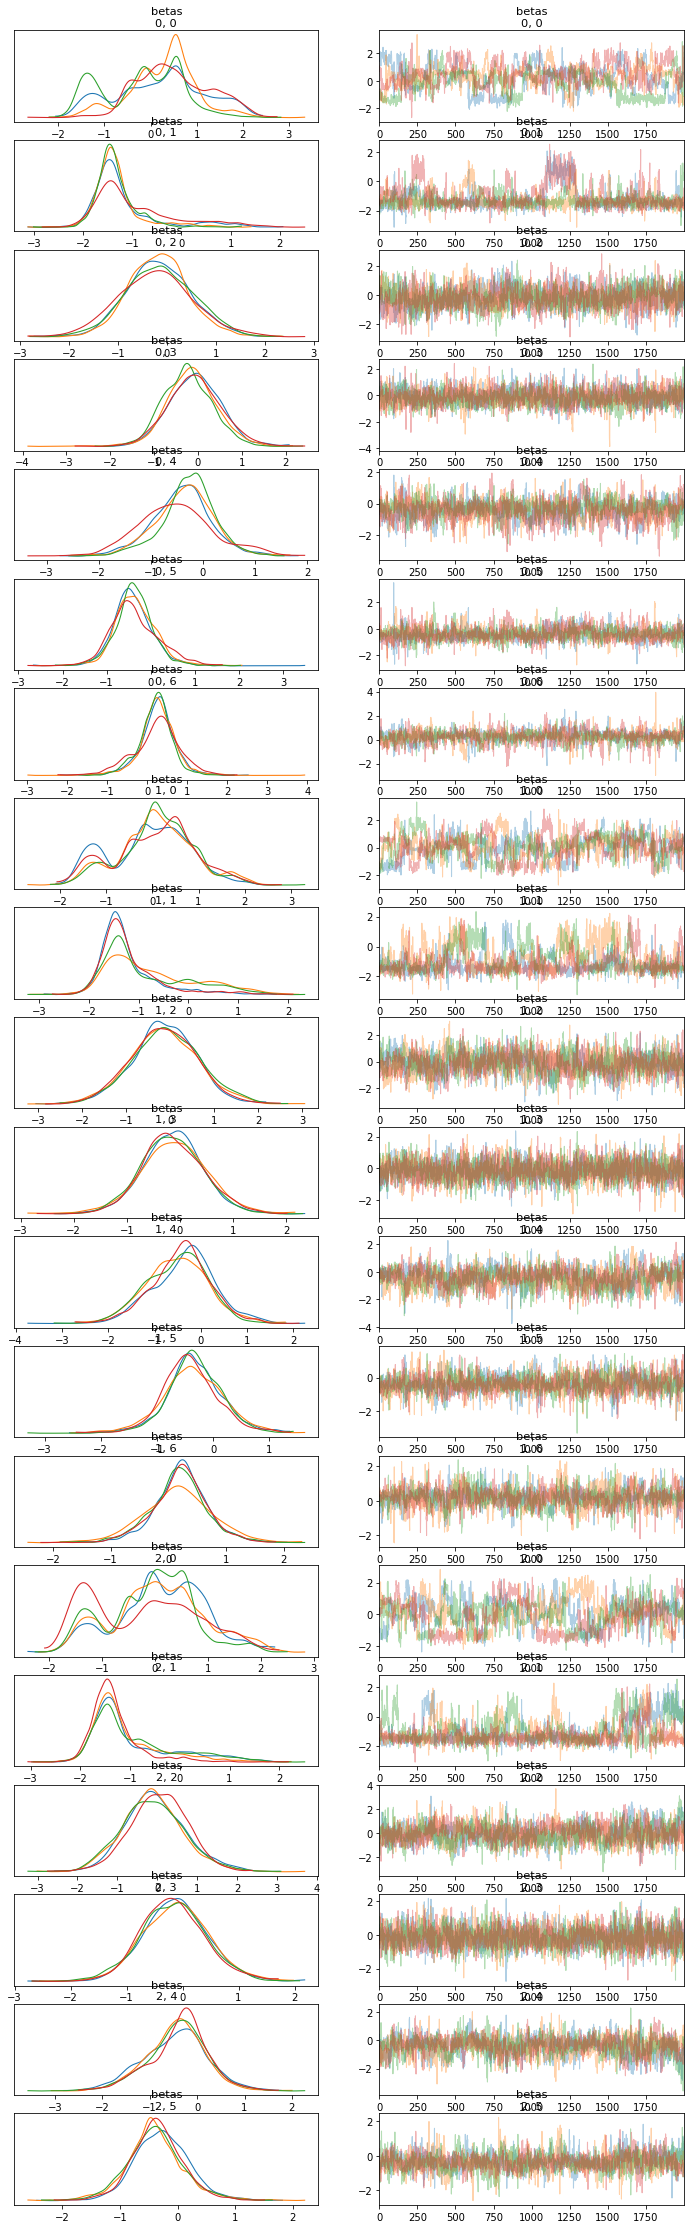

In [100]:
az.plot_trace(fit_az,var_names=["betas"], compact = False)
plt.show()

In [101]:
print(fit_az.posterior.s.values[0,1999,:]) #niente clustersss :(
print(fit_az.posterior.s.values[1,1999,:]) 
print(fit_az.posterior.s.values[2,1999,:]) 
print(fit_az.posterior.s.values[3,1999,:]) 
fit_az.posterior.s.values[0,:,:]

[10.  6.  2. 10.  8.  9.  2.  1.  2.  1.  1. 10.  2.  4.  9. 10.  8.  6.
  1. 10.  6. 10.  1.  2.  5.  9.  7.  7. 10.  1. 10.  8.  6.  6.  2.  4.
  9.  9.  7.  8.  2. 10. 10.  1.  4.  1.  9.  2.  1.  7. 10.  1.  2.  2.
  7.  8.  6.  6.  8.  9.  2.  6. 10.  6.  2.  1.  4.  9.  4. 10. 10.  9.
  6.  5.  1.  7.  6. 10.  7.  1. 10.  8. 10.  2.  1. 10.  1.  7.  9. 10.
  4. 10.  4.  5. 10.  8.  1. 10.  2.  4.  1.  6.  1. 10.  1.  2.]
[ 2.  1.  9. 10.  4.  6. 10. 10. 10.  9.  5.  1. 10. 10.  6.  2.  4.  1.
  6.  2.  1.  2. 10. 10. 10.  7.  7.  1.  2.  2.  2.  4.  1.  9. 10.  9.
  6.  1.  1.  6. 10.  6.  2. 10. 10. 10.  7. 10.  2.  6.  6.  6.  2. 10.
  1.  3.  1.  2.  4.  6. 10.  1.  9.  1.  2.  2.  9.  6. 10.  2.  2.  6.
  5.  8.  2.  7.  1. 10.  1.  6.  2. 10.  2. 10. 10.  2.  2.  7.  2. 10.
  9.  6. 10.  8.  2.  4. 10.  2. 10. 10. 10.  7.  2.  2.  2. 10.]
[10.  9. 10.  2.  7.  5.  2.  2.  2.  2.  3.  9.  2. 10.  8.  9.  7.  8.
  4. 10.  8. 10.  2.  2.  3.  9.  8.  9. 10. 10. 10.  7.  8.  4. 

array([[ 5.,  3.,  7., ...,  5.,  5., 10.],
       [ 5.,  2., 10., ...,  5.,  5., 10.],
       [ 3.,  3.,  5., ...,  5.,  5., 10.],
       ...,
       [ 2.,  6.,  1., ..., 10.,  1.,  2.],
       [ 2.,  7.,  1., ..., 10.,  1.,  2.],
       [10.,  6.,  2., ..., 10.,  1.,  2.]])

/home/riccardo/.local/lib/python3.9/site-packages/arviz/plots/traceplot.py:215: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (60), generating only 20 plots
  warnings.warn(


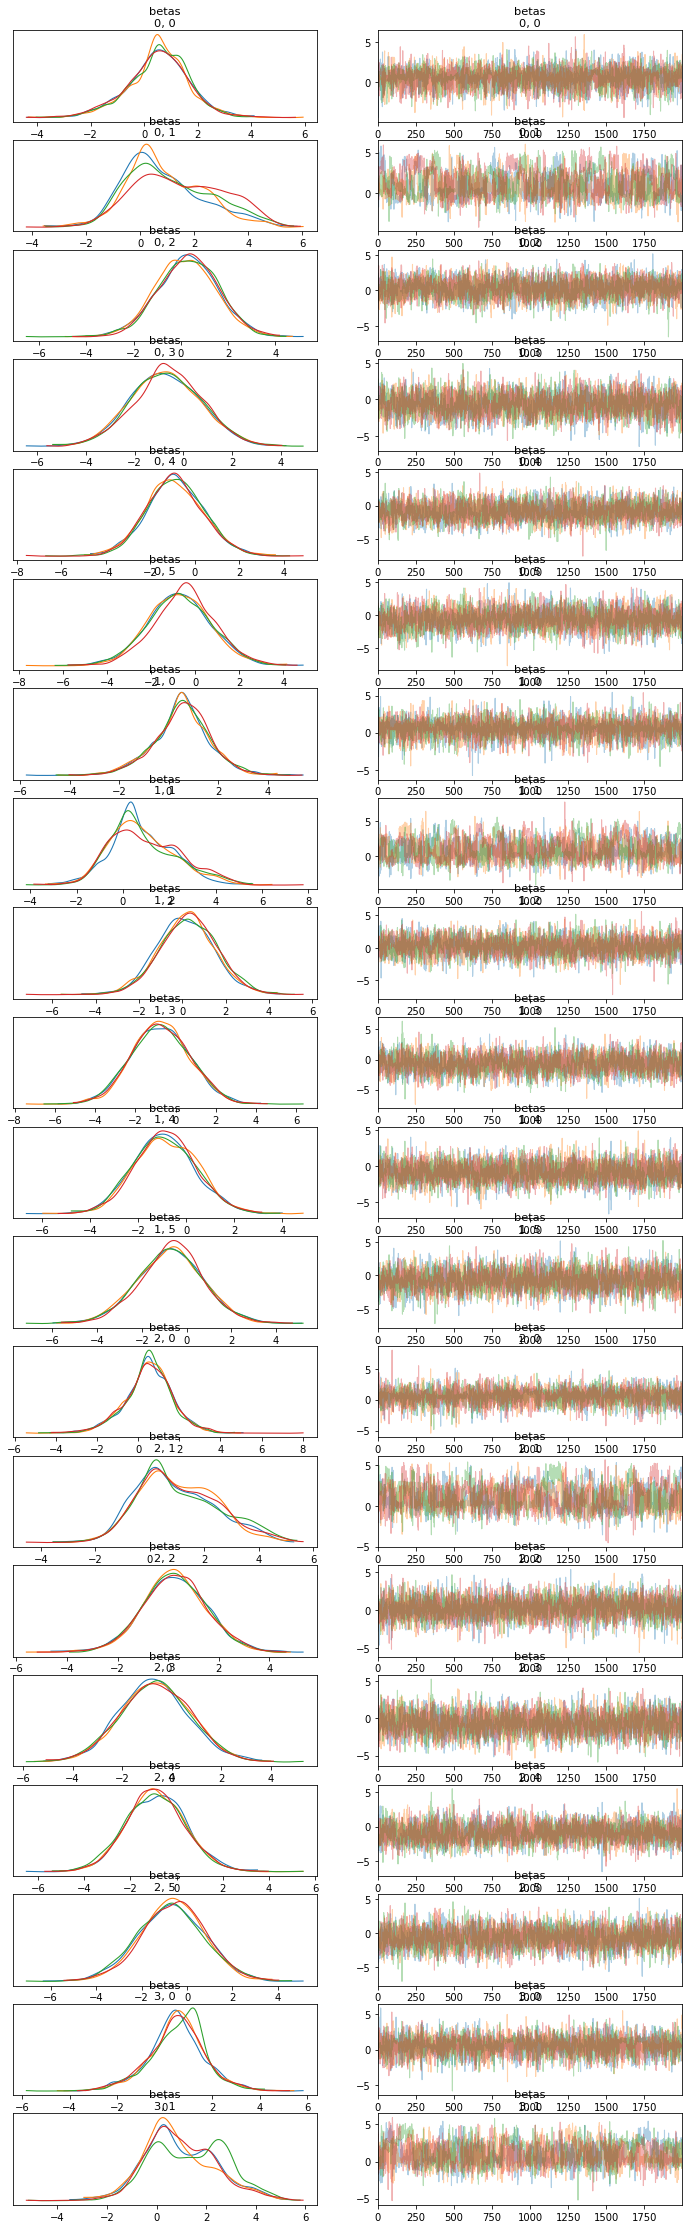

In [582]:
az.plot_trace(fit_az,var_names=["betas"], compact = False)
plt.show() b

In [584]:
print(fit_az.posterior.s.values[0,1999,:]) #niente clustersss :(
print(fit_az.posterior.s.values[1,1999,:]) 
print(fit_az.posterior.s.values[2,1999,:]) 
print(fit_az.posterior.s.values[3,1999,:]) 
fit_az.posterior.s.values[0,:,:]



[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
  5. 10. 10.  8. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10.  3. 10.  2. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10.  4. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
  8. 10. 10.  5. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10.  9. 10.  7. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10.  9. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 

array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])

# Credible interval, WAIC, LOO

In [ ]:
# posterior credible interval per i beta ma se li vuoi anche per i random effects
hdis = fit_az.hdi(fit, var_names=["betas"]).betas.values
hdis

In [98]:
# computation of WAIC 
fit_az.waic(fit)

AttributeError: 'InferenceData' object has no attribute 'waic'

In [96]:
#computation of LOO
az.loo(fit)

/home/riccardo/.local/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 8000 posterior samples and 106 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -835.47    49.12
p_loo      362.66        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        7    6.6%
 (0.5, 0.7]   (ok)         43   40.6%
   (0.7, 1]   (bad)        35   33.0%
   (1, Inf)   (very bad)   21   19.8%

# Model with fixed clustering using Binder Loss

In [228]:
# Fixed clustering s to study betas depending on clusters
beta_clus_stan = """
data
{
    int<lower=1> I; // number of areal locations
    int<lower=1> T; // number of time steps
    int<lower=1> P; // number of covariates
    int<lower=1> H; // number of possible clusters
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
    
      
    // hyperpar vector of regressors
    vector[P+1]     mu_0; 
    real        sigma_0;
    
    // w_1
    vector[I] mu_w_1;
    
    // alpha
    real<lower=0> a_alpha;
    real<lower=0> b_alpha;
    
    // tau^2
    real<lower=0> a_tau2;
    real<lower=0> b_tau2;
    
    // sigma^2
    real<lower=0> a_sigma2;
    real<lower=0> b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real<lower=0> a_xi;
    real<lower=0> b_xi;
    
    int s[I];
    
    // Qinv
    matrix[I,I] inv_Q;
}

transformed data
{
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
}

parameters
{
    real<lower=0> sigma2;
    real<lower=0> tau2;
    
    // autoregressive coefficient construction
    real<lower=0,upper=1> xi_constructor;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas_clus; 
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // autoregressive coefficient of the random effects
    real xi = 2*xi_constructor-1;
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma = sqrt(sigma2);
    real tau = sqrt(tau2);
}

model
{
    
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    xi_constructor ~ beta(a_xi,b_xi);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas_clus[h] ~ normal(mu_0, sigma_0);
    
    for (i in 1:I){
        int clus_i = s[i]+1;
        
        y[i] ~ normal(X[i]*betas_clus[clus_i] + ws[1:T,i], sigma);
    }    
}

"""

stan_file = "beta_clus.stan"

with open(stan_file, "w") as fp:
    fp.write(beta_clus_stan)
    
beta_clus = CmdStanModel(stan_file=stan_file)

10:13:40 - cmdstanpy - INFO - compiling stan file /home/riccardo/bayesian-project/beta_clus.stan to exe file /home/riccardo/bayesian-project/beta_clus
10:14:10 - cmdstanpy - INFO - compiled model executable: /home/riccardo/bayesian-project/beta_clus
10:14:10 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
10:14:10 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/riccardo/bayesian-project/beta_clus.hpp /home/riccardo/bayesian-project/beta_clus.stan
Warning in '/home/riccardo/bayesian-project/beta_clus.stan', line 39, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
/u/sw/toolchains/gcc-glibc/11.2.0/prefix/bin/g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      

In [231]:
s= s_fixed.astype(int)

data_clus = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X_r,
    "mu_0": mu_0,
    "sigma_0": sigma_0,
    "mu_w_1": mu_w_1,
    "a_alpha": 3,
    "b_alpha": 2,
    "a_tau2": 3,
    "b_tau2": 2,
    "a_sigma2": 3,
    "b_sigma2": 2,
    "rho": 0.95,
    "a_xi": 1,
    "b_xi": 1,
    "s": s,
    "inv_Q": Qinv
}


[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


In [232]:
fit_clus = beta_clus.sample(data_clus
#                     , show_console = True
#                    , chains=4
#                     , adapt_delta=0.9
#                    , step_size = 1.5
#                    , max_treedepth = 100
                   )

10:17:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:26:49 - cmdstanpy - INFO - CmdStan done processing.
10:26:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/beta_clus.stan', line 93, column 4 to column 30)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/riccardo/bayesian-project/beta_clus.stan', line 93, column 4 to column 30)
Consider re-running with show_console=True if the above output is unclear!


10:26:50 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 1000 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.
